In [2]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse, circle

## Load a checkerboard image 

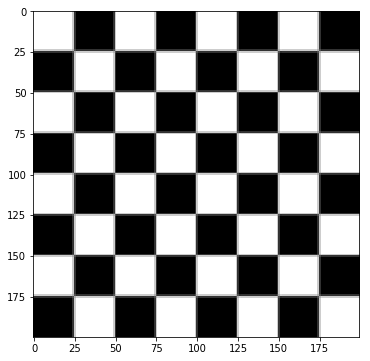

In [4]:
checkerboard = data.checkerboard()

plt.figure(figsize=(6,6))
plt.imshow(checkerboard, cmap='gray')

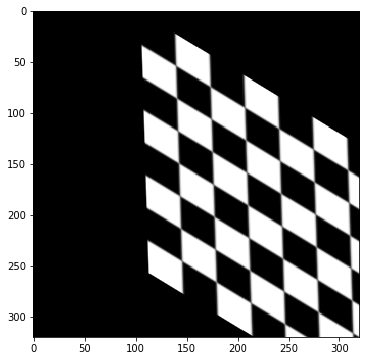

In [26]:
transform = AffineTransform(scale=(0.9, 0.8), rotation=1, shear=0.6, translation=(150, -80))

warped_checkerboard = warp(checkerboard, transform, output_shape=(320, 320))

plt.figure(figsize=(6,6))
plt.imshow(warped_checkerboard, cmap='gray')

<b>Compute Harris corner measure response image.</b>

 * Harris' corner detection is done by considering the differential of corner score with respect to its direction
 * It uses a 2D gray-scale image and creates an image patch of (u,v) area and to create another patch shift it to (x,y) location in the original image.
 * Calculate the weighted sum of squared differences (SSD) between these two patches and perform Taylor expansion to approximate the equation to 
 * This will end up creating Harris matrix. Corner detection is done by analyzing the eigenvalues of Harris matrix.
  * If lambda_1 = 0 and lambda_2 = 0 then this pixel (x,y) has no features of interest.
  * If lambda_1 = 0 and lambda_2 = some positive value then an edge is found.
  * If lambda_1 and lambda_2 = Large positive values then a corner is found.

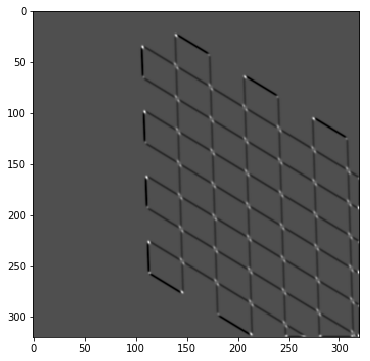

In [33]:
corners = corner_harris(warped_checkerboard)

plt.figure(figsize=(6,6))
plt.imshow(corners, cmap='gray')

<b>Find corner_peaks in an image as coordinate list or boolean mask.</b>

  * min_distance = Minimum number of pixels separating interest points and image boundary.


In [36]:
coords_peaks = corner_peaks(corners, min_distance=1)

coords_peaks.shape

(104, 2)

<b>Find subpixel position of corners.</b>

* coords = Corner coordinates (row, col)
* window = Search window size for subpixel estimation

A statistical test decides whether the corner is defined as the intersection of two edges or a single peak. Depending on the classification result, the subpixel corner location is determined based on the local covariance of the grey-values. If the significance level for either statistical test is not sufficient, the corner cannot be classified, and the output subpixel position is set to NaN.

In [38]:
coords_subpix = corner_subpix(warped_checkerboard, coords_peaks, window_size=10)

### Compare the coords_peaks and the coords_subpix

In [40]:
coords_peaks[0:11]

array([[ 24, 140],
       [ 35, 107],
       [ 52, 138],
       [ 56, 141],
       [ 65, 108],
       [ 65, 207],
       [ 73, 172],
       [ 76, 174],
       [ 84, 139],
       [ 84, 239],
       [ 88, 142]])

In [41]:
coords_subpix[0:11]

array([[ 22.678218  , 138.75079434],
       [ 34.02580381, 106.1266241 ],
       [ 54.20784448, 139.67099374],
       [ 54.36559672, 139.70226486],
       [ 65.68528877, 107.0559618 ],
       [ 63.5966865 , 205.97892805],
       [ 74.66101104, 173.26359611],
       [ 74.74355977, 173.26362267],
       [ 86.0721085 , 140.6525575 ],
       [ 83.74255892, 239.49864943],
       [ 86.25265808, 140.69021517]])

<b>Plot the corner_peaks and corner_subpix in the image</b>

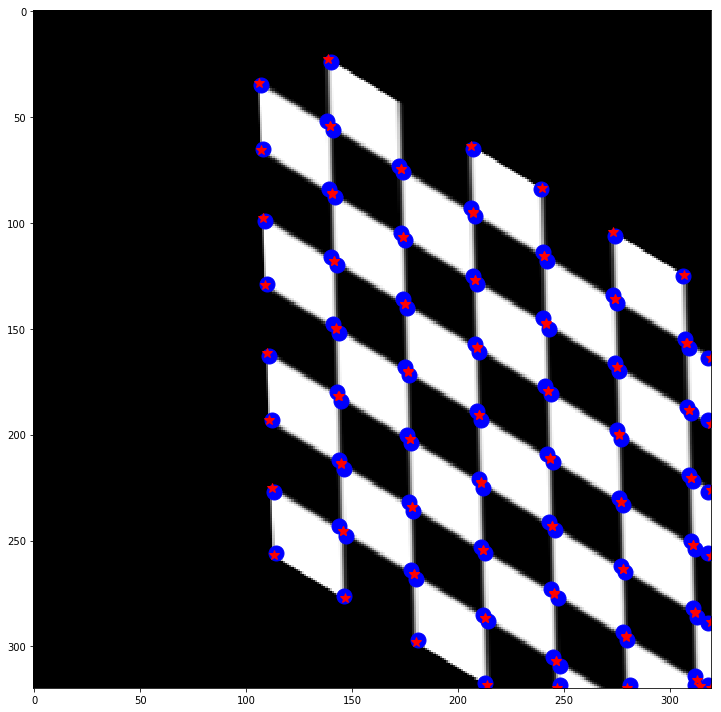

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(warped_checkerboard, interpolation='nearest', cmap='gray')

ax.plot(coords_peaks[:, 1], coords_peaks[:, 0], '.b', markersize=30)

ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '*r', markersize=10)

plt.tight_layout()
plt.show()